In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intraretinal-cystoid-fluid/model_eye_diseases7_denoised.h5
/kaggle/input/intraretinal-cystoid-fluid/Y_train_1006.pickle
/kaggle/input/intraretinal-cystoid-fluid/X_test_149.pickle
/kaggle/input/intraretinal-cystoid-fluid/X_train_1006.pickle
/kaggle/input/intraretinal-cystoid-fluid/testing-complete-oct-scans-/oct 12/oct 12 041.jpg
/kaggle/input/intraretinal-cystoid-fluid/testing-complete-oct-scans-/oct 12/oct 12 066.jpg
/kaggle/input/intraretinal-cystoid-fluid/testing-complete-oct-scans-/oct 12/oct 12 112.jpg
/kaggle/input/intraretinal-cystoid-fluid/testing-complete-oct-scans-/oct 12/oct 12 055.jpg
/kaggle/input/intraretinal-cystoid-fluid/testing-complete-oct-scans-/oct 12/oct 12 001.jpg
/kaggle/input/intraretinal-cystoid-fluid/testing-complete-oct-scans-/oct 12/oct 12 022.jpg
/kaggle/input/intraretinal-cystoid-fluid/testing-complete-oct-scans-/oct 12/oct 12 129.jpg
/kaggle/input/intraretinal-cystoid-fluid/testing-complete-oct-scans-/oct 12/oct 12 119.jpg
/kaggle/input/intr

In [5]:
import os
import numpy as np
import cv2   #if u have dimension error use cv2 for image read its better than 'from skimage.io import imread'
from tqdm import tqdm       
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray
from scipy import ndimage as nd 

In [6]:
from scipy import ndimage, misc
from skimage import color, data, restoration
from skimage import img_as_float 

In [7]:
IMG_WIDTH = 320
IMG_HEIGHT = 320
IMG_CHANNELS = 3


TRAIN_PATH = '/kaggle/input/intraretinal-cystoid-fluid/2021-training-data-ZA/2021-training-data-ZA/'

train_ids = next(os.walk(TRAIN_PATH))[1]
print('length of train IDs: ', len(train_ids))

length of train IDs:  1460


In [8]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1),  dtype='bool')

print('X_train shape ', X_train.shape)
#print(X_train.dtype)
#print(X_train)

print('Y_train shape ', Y_train.shape)
#print(Y_train.dtype)
#print(Y_train)

X_train shape  (1460, 320, 320, 3)
Y_train shape  (1460, 320, 320, 1)


In [9]:
alpha = 1.4 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)
psf = np.ones((5, 5)) / 25 

In [10]:
import pickle

pickle_in = open("/kaggle/input/intraretinal-cystoid-fluid/X_train_1006.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("/kaggle/input/intraretinal-cystoid-fluid/Y_train_1006.pickle","rb")
Y_train = pickle.load(pickle_in)

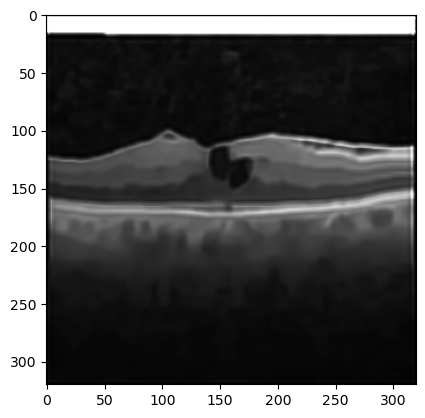

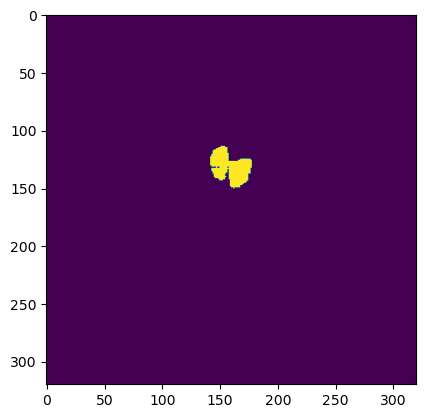

In [11]:
plt.imshow(X_train[9])
plt.show()
plt.imshow(np.squeeze(Y_train[9]))

In [12]:
import tensorflow as tf

In [13]:

inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

In [14]:
model_input = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

In [15]:
# Import necessary libraries
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Define U-Net model architecture
def unet(input_shape=(320,320,3)):
    
        c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(model_input)
        # add dropout b/w convolutional layers to prevent overfitting
        c1 = tf.keras.layers.Dropout(0.1)(c1)
        c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
        p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    
        c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
        # add dropout b/w convolutional layers to prevent overfitting
        c2 = tf.keras.layers.Dropout(0.1)(c2)
        c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
        p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    
        c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
        # add dropout b/w convolutional layers to prevent overfitting
        c3 = tf.keras.layers.Dropout(0.2)(c3)
        c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
        p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    
        c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
        # add dropout b/w convolutional layers to prevent overfitting
        c4 = tf.keras.layers.Dropout(0.2)(c4)
        c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
        p4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c4)
        
        c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
        # add dropout b/w convolutional layers to prevent overfitting
        c5 = tf.keras.layers.Dropout(0.3)(c5)
        c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
        #EXPANSION/DECODER PATH
    
        u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
        u6 = tf.keras.layers.concatenate([u6, c4])
        c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
        c6 = tf.keras.layers.Dropout(0.2)(c6)
        c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
        u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
        u7 = tf.keras.layers.concatenate([u7, c3])
        c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
        c7 = tf.keras.layers.Dropout(0.2)(c7)
        c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    
        u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
        u8 = tf.keras.layers.concatenate([u8, c2])
        c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
        c8 = tf.keras.layers.Dropout(0.1)(c8)
        c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
        u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
        u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
        c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
        c9 = tf.keras.layers.Dropout(0.1)(c9)
        c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    
        outputs = tf.keras.layers.Conv2D(1,(1, 1), activation='sigmoid')(c9)
   
        model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', "AUC" , "Recall", "Precision"])
    
        return model

In [16]:

model = unet(input_shape=(320,320,3))

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 320, 320, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 320, 320, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [17]:
import datetime

mylog = "./logs"

#ModelCheckpoint
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        #tf.keras.callbacks.TensorBoard(log_dir=mylog + datetime.datetime.now().strftime("%d %m %Y c")),
        #tf.keras.callbacks.ModelCheckpoint('../input/intraretinal-cystoid-fluid/model_eye_diseases7_denoised.h5', save_best_only=True, save_weights_only=True, verbose=2)
        ]

results = model.fit(X_train, Y_train, validation_split=0.2, batch_size=8, epochs=1, callbacks=callbacks)

101/101 [==============================] - 563s 6s/step - loss: 0.0655 - accuracy: 0.9939 - auc: 0.7339 - recall: 2.0055e-04 - precision: 0.0081 - val_loss: 0.0156 - val_accuracy: 0.9941 - val_auc: 0.9865 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00


In [20]:
 
model = unet(input_shape=(320,320,3))

# Load weights
model.load_weights('../input/intraretinal-cystoid-fluid/model_eye_diseases7_denoised.h5')

loss,acc,auc,rec,prec = model.evaluate(X_train, Y_train, verbose=2)

print("Restored model, accuracy:                     {:5.2f}%".format(100*acc))
print("Restored model, Loss:                         {:5.2f}%".format(100*loss))
print("Restored model, Area Under the Curve (AUC):   {:5.2f}%".format(100*auc))
print("Restored model, Recall:                       {:5.2f}%".format(100*rec))
print("Restored model, Precesion:                    {:5.2f}%".format(100*prec))

32/32 - 155s - loss: 0.0051 - accuracy: 0.9981 - auc: 0.9966 - recall: 0.8086 - precision: 0.8644 - 155s/epoch - 5s/step
Restored model, accuracy:                     99.81%
Restored model, Loss:                          0.51%
Restored model, Area Under the Curve (AUC):   99.66%
Restored model, Recall:                       80.86%
Restored model, Precesion:                    86.44%


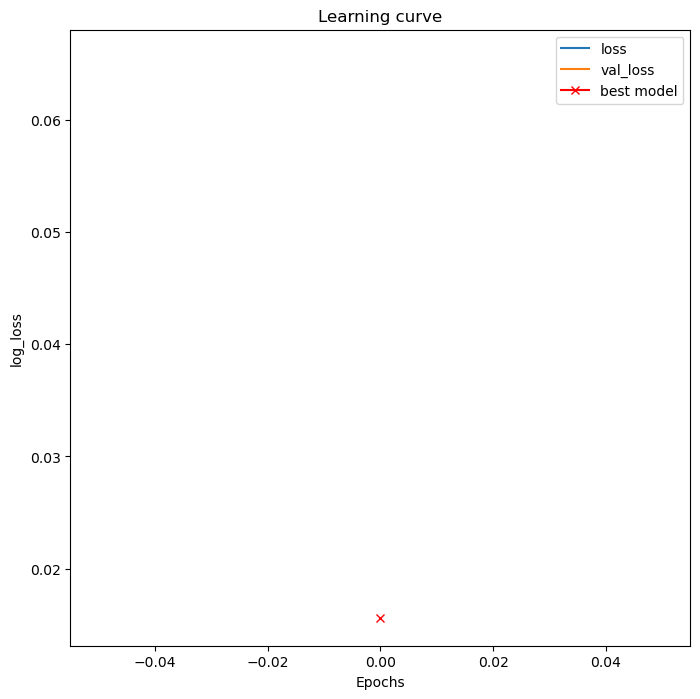

In [23]:
#loss
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

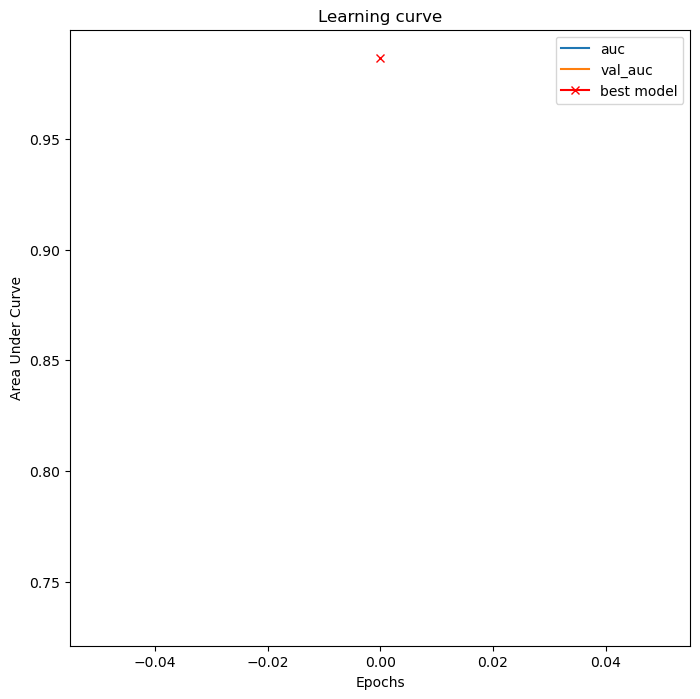

In [24]:
#AUC
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["auc"], label="auc")
plt.plot(results.history["val_auc"], label="val_auc")
plt.plot( np.argmax(results.history["val_auc"]), np.max(results.history["val_auc"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Area Under Curve")
plt.legend();

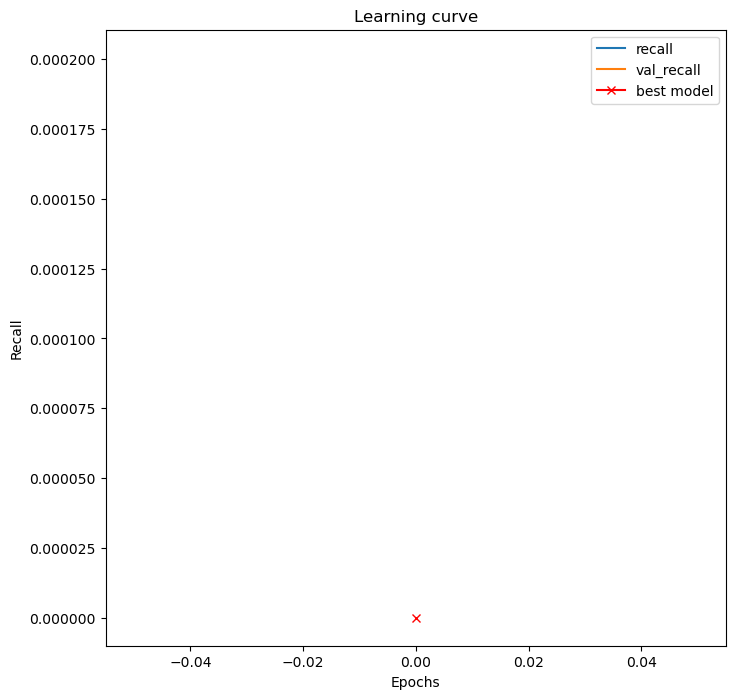

In [25]:
# "Recall"
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["recall"], label="recall")
plt.plot(results.history["val_recall"], label="val_recall")
plt.plot( np.argmax(results.history["val_recall"]), np.max(results.history["val_recall"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend();

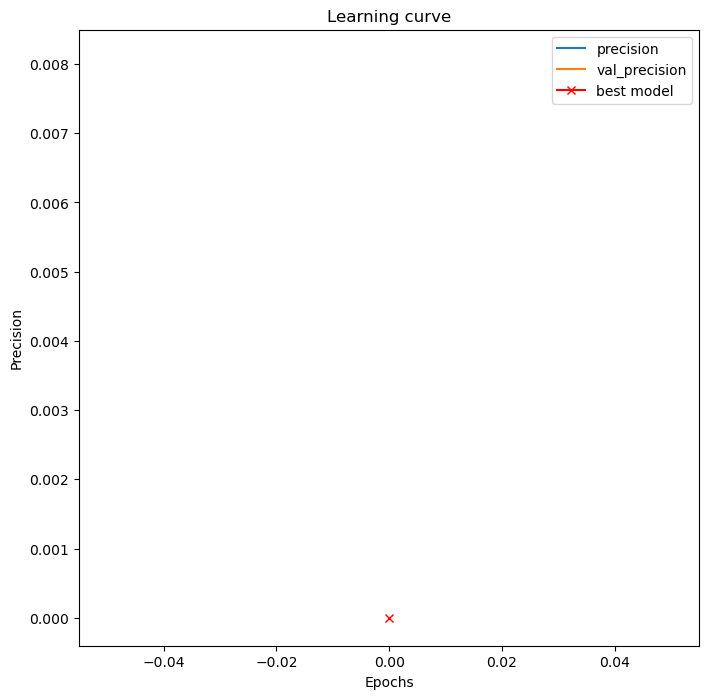

In [27]:
#"Precision"

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["precision"], label="precision")
plt.plot(results.history["val_precision"], label="val_precision")
plt.plot( np.argmax(results.history["val_precision"]), np.max(results.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend();